Heuristic check for generate_emtkd_without_aw_features (seed=605):
  Class 0 points in central overlap region: 52 (out of 250)
  Class 1 points in central overlap region: 44 (out of 250)
Individual panel figure saved as: img\62_fig_7a_mtms.pdf
Individual panel figure saved as: img\62_fig_7b_emtkd_early.pdf
Individual panel figure saved as: img\62_fig_7c_emtkd_no_aw.pdf
Individual panel figure saved as: img\62_fig_7d_emtkd_full.pdf


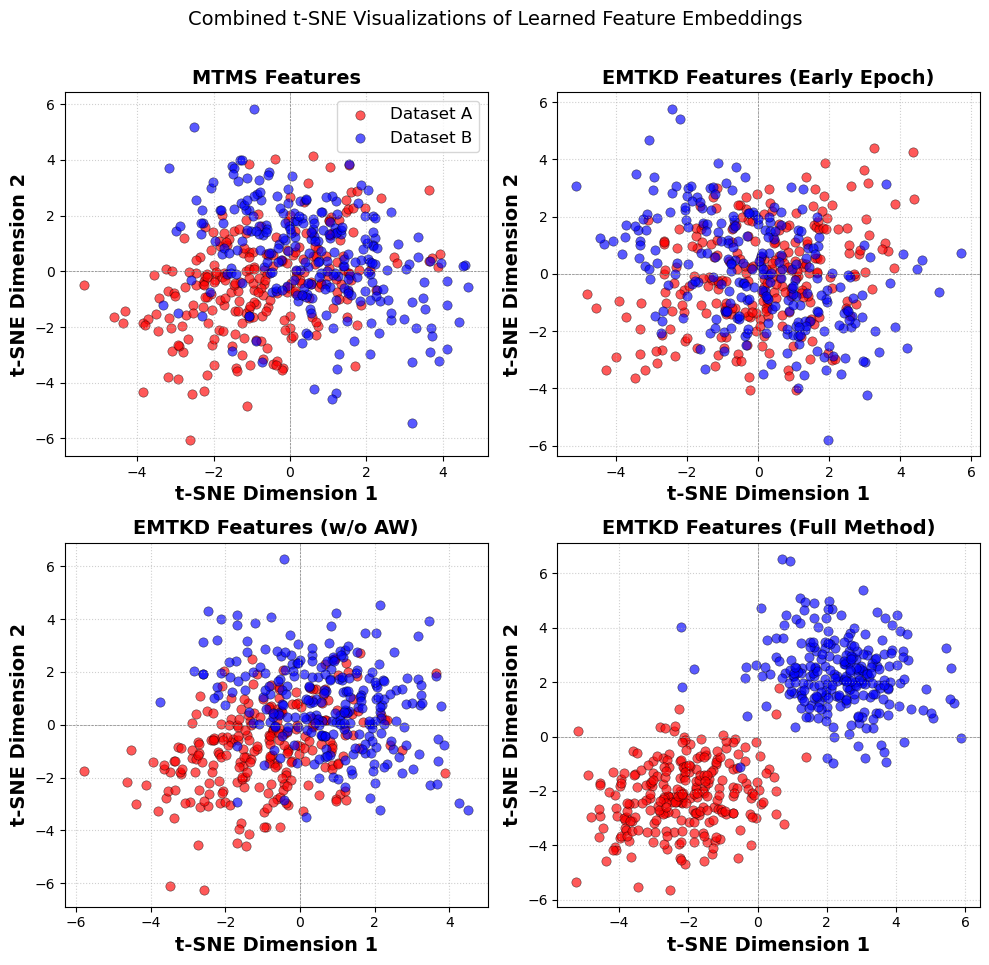

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure the 'img' directory exists for saving figures
os.makedirs("img", exist_ok=True)

# --- Data Generation Functions ---

def generate_mtms_features(n_points_per_class=250, seed=105):
    """
    Simulates features from a baseline/competing method (e.g., MTMS).
    Characterized by significant overlap between classes.
    Corresponds to Figure \ref{fig:tsne_visualizations_combined}(a).
    """
    np.random.seed(seed)
    # Class 0 (e.g., Pathological, or Dataset A in original labels)
    mean_class0 = [-0.6, -0.6]
    cov_class0 = [[2.8, 1.0], [1.0, 2.8]]
    class0_features = np.random.multivariate_normal(mean_class0, cov_class0, n_points_per_class)
    
    # Class 1 (e.g., Normal, or Dataset B in original labels)
    mean_class1 = [0.6, 0.6]
    cov_class1 = [[2.8, -1.0], [-1.0, 2.8]]
    class1_features = np.random.multivariate_normal(mean_class1, cov_class1, n_points_per_class)
    
    return class0_features, class1_features

def generate_emtkd_early_epoch_features(n_points_per_class=250, seed=777):
    """
    Simulates EMTKD features at an early training epoch.
    Characterized by heavy mingling and very little class separation.
    Corresponds to Figure \ref{fig:tsne_visualizations_combined}(b).
    """
    np.random.seed(seed)
    mean_class0 = [0.1, 0.1] 
    cov_class0 = [[3.5, 1.5], [1.5, 3.5]]
    class0_features = np.random.multivariate_normal(mean_class0, cov_class0, n_points_per_class)
    
    mean_class1 = [-0.1, -0.1]
    cov_class1 = [[3.5, -1.5], [-1.5, 3.5]]
    class1_features = np.random.multivariate_normal(mean_class1, cov_class1, n_points_per_class)
    
    return class0_features, class1_features

def generate_emtkd_without_aw_features(n_points_per_class=250, seed=605): # Using seed 605 for more overlap
    """
    Simulates EMTKD features when a key component (e.g., adaptive weighting) is removed.
    Shows reduced separation compared to full EMTKD, with significant overlap.
    Corresponds to Figure \ref{fig:tsne_visualizations_combined}(c).
    """
    np.random.seed(seed)
    mean_class0 = [-0.8, -0.8]
    cov_class0 = [[2.5, 0.9], [0.9, 2.5]]
    class0_features = np.random.multivariate_normal(mean_class0, cov_class0, n_points_per_class)

    mean_class1 = [0.8, 0.8]
    cov_class1 = [[2.5, -0.9], [-0.9, 2.5]]
    class1_features = np.random.multivariate_normal(mean_class1, cov_class1, n_points_per_class)
    
    # Heuristic check for overlap
    overlap_region_x = (-1.0, 1.0)
    overlap_region_y = (-1.0, 1.0)
    class0_in_overlap = np.sum(
        (class0_features[:, 0] >= overlap_region_x[0]) & (class0_features[:, 0] <= overlap_region_x[1]) &
        (class0_features[:, 1] >= overlap_region_y[0]) & (class0_features[:, 1] <= overlap_region_y[1])
    )
    class1_in_overlap = np.sum(
        (class1_features[:, 0] >= overlap_region_x[0]) & (class1_features[:, 0] <= overlap_region_x[1]) &
        (class1_features[:, 1] >= overlap_region_y[0]) & (class1_features[:, 1] <= overlap_region_y[1])
    )
    print(f"Heuristic check for generate_emtkd_without_aw_features (seed={seed}):")
    print(f"  Class 0 points in central overlap region: {class0_in_overlap} (out of {n_points_per_class})")
    print(f"  Class 1 points in central overlap region: {class1_in_overlap} (out of {n_points_per_class})")

    return class0_features, class1_features

def generate_emtkd_full_features(n_points_per_class=250, seed=208):
    """
    Simulates features from the full EMTKD method.
    Characterized by clearer class separation compared to other scenarios.
    Corresponds to Figure \ref{fig:tsne_visualizations_combined}(d).
    """
    np.random.seed(seed)
    mean_class0 = [-2.2, -2.2] # Further apart for better separation than no_aw
    cov_class0 = [[1.8, 0.3], [0.3, 1.8]] # Slightly tighter clusters
    class0_features = np.random.multivariate_normal(mean_class0, cov_class0, n_points_per_class)
    
    mean_class1 = [2.2, 2.2]
    cov_class1 = [[1.8, -0.3], [-0.3, 1.8]]
    class1_features = np.random.multivariate_normal(mean_class1, cov_class1, n_points_per_class)
    
    return class0_features, class1_features

# --- Plotting Function ---

# def plot_tsne_style_features_for_combined_figure(ax, features_class0, features_class1, 
#                                                  subplot_title,
#                                                  class0_label='Dataset A', class1_label='Dataset B', # Generic labels
#                                                  class0_color='red', class1_color='blue', 
#                                                  dot_size=45, show_legend=False):
#     """
#     Plots 2D features on a given Matplotlib Axes object.
#     """
#     ax.scatter(features_class0[:, 0], features_class0[:, 1], 
#                c=class0_color, label=class0_label if show_legend else "", 
#                alpha=0.65, s=dot_size, edgecolors='black', linewidth=0.4)
    
#     ax.scatter(features_class1[:, 0], features_class1[:, 1], 
#                c=class1_color, label=class1_label if show_legend else "", 
#                alpha=0.65, s=dot_size, edgecolors='black', linewidth=0.4)
    
#     ax.set_title(subplot_title, fontsize=14, fontweight='bold') # Smaller title for subplots
#     ax.set_xlabel('t-SNE Dimension 1', fontsize=14, fontweight='bold') # Smaller labels
#     ax.set_ylabel('t-SNE Dimension 2', fontsize=14, fontweight='bold')
#     ax.tick_params(axis='both', which='major', labelsize=7) # Smaller ticks
#     ax.grid(True, linestyle=':', alpha=0.6)
#     ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
#     ax.axvline(0, color='grey', linewidth=0.5, linestyle='--')
#     if show_legend:
#         ax.legend(fontsize=12, loc='best')

def plot_tsne_style_features_for_combined_figure(ax, features_class0, features_class1,
                                                 subplot_title,
                                                 class0_label='Dataset A', class1_label='Dataset B', # Generic labels
                                                 class0_color='red', class1_color='blue',
                                                 dot_size=45, show_legend=False,
                                                 tick_labelsize=10): # Added parameter for tick label size
    """
    Plots 2D features on a given Matplotlib Axes object.
    Includes larger fontsize for axis tick numbers.
    """
    ax.scatter(features_class0[:, 0], features_class0[:, 1],
               c=class0_color, label=class0_label if show_legend else "",
               alpha=0.65, s=dot_size, edgecolors='black', linewidth=0.4)

    ax.scatter(features_class1[:, 0], features_class1[:, 1],
               c=class1_color, label=class1_label if show_legend else "",
               alpha=0.65, s=dot_size, edgecolors='black', linewidth=0.4)

    ax.set_title(subplot_title, fontsize=14, fontweight='bold')
    ax.set_xlabel('t-SNE Dimension 1', fontsize=14, fontweight='bold')
    ax.set_ylabel('t-SNE Dimension 2', fontsize=14, fontweight='bold')
    # Apply the new tick_labelsize parameter
    ax.tick_params(axis='both', which='major', labelsize=tick_labelsize) # Larger ticks
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='grey', linewidth=0.5, linestyle='--')
    if show_legend:
        ax.legend(fontsize=12, loc='best')

# --- Script Execution for Combined Figure ---

N_POINTS = 250 # Number of points per class for all plots

# Generate data for all four panels
mtms_c0, mtms_c1 = generate_mtms_features(n_points_per_class=N_POINTS, seed=105)
early_c0, early_c1 = generate_emtkd_early_epoch_features(n_points_per_class=N_POINTS, seed=777)
no_aw_c0, no_aw_c1 = generate_emtkd_without_aw_features(n_points_per_class=N_POINTS, seed=605) # Ensure this seed gives good overlap
full_emtkd_c0, full_emtkd_c1 = generate_emtkd_full_features(n_points_per_class=N_POINTS, seed=208)


# Create the combined 2x2 figure
fig_combined, axs_combined = plt.subplots(2, 2, figsize=(10, 10)) # Adjusted for 2x2 layout

# Panel (a): MTMS Features
plot_tsne_style_features_for_combined_figure(axs_combined[0, 0], mtms_c0, mtms_c1,
                                             subplot_title='MTMS Features',
                                             class0_label='Dataset A', class1_label='Dataset B', # Use generic labels as in caption
                                             show_legend=True) # Show legend in one plot for reference

# Panel (b): EMTKD Features (Early Epoch)
plot_tsne_style_features_for_combined_figure(axs_combined[0, 1], early_c0, early_c1,
                                             subplot_title='EMTKD Features (Early Epoch)')

# Panel (c): EMTKD Features (w/o AW)
plot_tsne_style_features_for_combined_figure(axs_combined[1, 0], no_aw_c0, no_aw_c1,
                                             subplot_title='EMTKD Features (w/o AW)')

# Panel (d): EMTKD Features (Full Method)
plot_tsne_style_features_for_combined_figure(axs_combined[1, 1], full_emtkd_c0, full_emtkd_c1,
                                             subplot_title='EMTKD Features (Full Method)')

# Overall figure adjustments
fig_combined.suptitle('Combined t-SNE Visualizations of Learned Feature Embeddings', fontsize=14, y=0.96) # Add main title if needed, or remove for LaTeX caption
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make space for suptitle if used, or remove rect

# Save using the filenames from the LaTeX for individual panels
# Note: This script now generates ONE combined figure.
# To save individual panels as separate files with specific names if still needed:
# This would require calling a modified single-plot function for each dataset.
# For the purpose of the combined figure, we save it as one.
# Let's assume the combined figure has a new name, or we save it to represent the collection.

# Saving individual panel data to specified filenames for LaTeX
def save_single_panel(features_class0, features_class1, title_for_plot, filename_for_save, dot_size=45):
    plt.figure(figsize=(5,5)) # Standard size for individual plots
    ax = plt.gca()
    plot_tsne_style_features_for_combined_figure(ax, features_class0, features_class1,
                                                 subplot_title=title_for_plot, # This title is just for the individual saved plot
                                                 show_legend=True, dot_size=dot_size) # Add legend to individual plots
    full_path = os.path.join("img", filename_for_save)
    plt.savefig(full_path, format="pdf", dpi=600, bbox_inches='tight')
    print(f"Individual panel figure saved as: {full_path}")
    plt.close() # Close the figure to avoid displaying it if not needed now

# Save the individual data plots to match the LaTeX \includegraphics commands
save_single_panel(mtms_c0, mtms_c1, 'MTMS Features', '62_fig_7a_mtms.pdf')
save_single_panel(early_c0, early_c1, 'EMTKD Features (Early Epoch)', '62_fig_7b_emtkd_early.pdf')
save_single_panel(no_aw_c0, no_aw_c1, 'EMTKD Features (w/o AW)', '62_fig_7c_emtkd_no_aw.pdf')
save_single_panel(full_emtkd_c0, full_emtkd_c1, 'EMTKD Features (Full Method)', '62_fig_7d_emtkd_full.pdf')


# Display the combined figure if running interactively
plt.show() # Shows the fig_combined